In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import wrangle as w
import explore as e

np.random.seed(42)

In [2]:
df = w.get_telco_data()

csv file found and read


In [3]:
#df.info()

In [4]:
#df.head().T

In [5]:
df = w.prep_telco_to_explore(df) 

In [ ]:
#df.head().T

In [6]:
# split into train, validate, test for exploration
target = 'churn'
train, validate, test = w.split_function(df, target)

Prepared df: (7043, 47)

Train: (4225, 47)
Validate: (1409, 47)
Test: (1409, 47)


In [7]:
# get first 20 columns (non-encoded columns) to make it easier to look at
ne_train = e.get_telco_ne_df(train)
ne_train.head().T

,2332,5275,6429,89,6412
gender,Male,Male,Male,Female,Female
senior_citizen,0,0,0,1,0
partner,No,No,No,No,No
dependents,No,No,No,No,No
tenure,12,1,59,27,54
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,Yes,Yes,Yes,Yes,Yes
internet_service_type,Fiber optic,DSL,DSL,Fiber optic,Fiber optic
online_security,No,No,No,No,No
online_backup,No,No,No,Yes,Yes


# Explore - Hypothesize/Visualize/Analyze (w/ stats)/Summarize

## Visualize - First, I'm going to look at all the categorical variables and all the numeric variables and visualize them just to see.

In [8]:
# separate columns by categorical and numeric
col_cats = []
num_cats = []

for col in ne_train.columns:
    if ne_train[col].dtype == 'O':
        col_cats.append(col)
    else:
        if len(ne_train[col].unique()) < 4: # make anything with less than 4 unique values a categorical variable
            col_cats.append(col)
        else:
            num_cats.append(col)
print("col_cats = ")
print(col_cats)
print("num_cats")
print(num_cats)

col_cats = 
['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service_type', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'paperless_billing', 'payment_type', 'churn']
num_cats
['tenure', 'monthly_charges', 'total_charges']


### categorical variables

GENDER
Male      2129
Female    2096
Name: gender, dtype: int64
Male      0.503905
Female    0.496095
Name: gender, dtype: float64


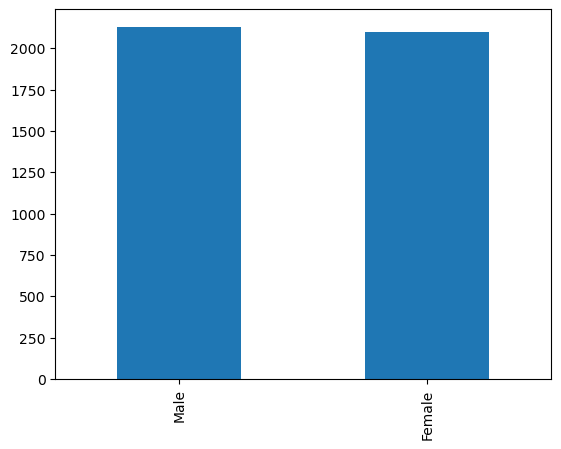


SENIOR_CITIZEN
0    3553
1     672
Name: senior_citizen, dtype: int64
0    0.840947
1    0.159053
Name: senior_citizen, dtype: float64


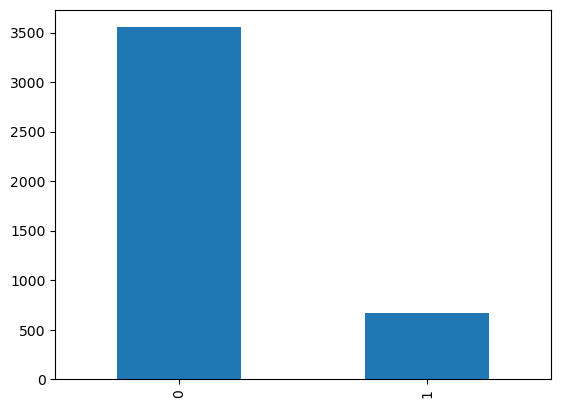


PARTNER
No     2199
Yes    2026
Name: partner, dtype: int64
No     0.520473
Yes    0.479527
Name: partner, dtype: float64


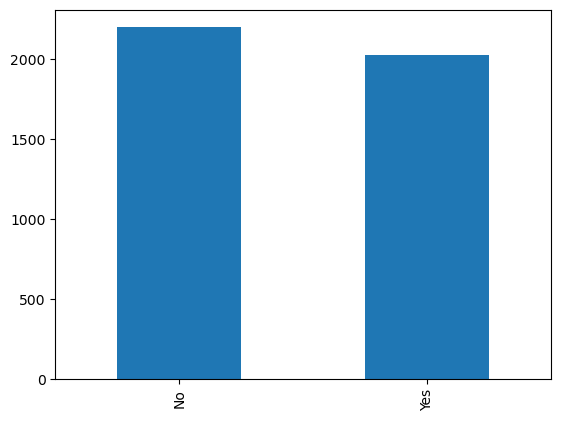


DEPENDENTS
No     2934
Yes    1291
Name: dependents, dtype: int64
No     0.694438
Yes    0.305562
Name: dependents, dtype: float64


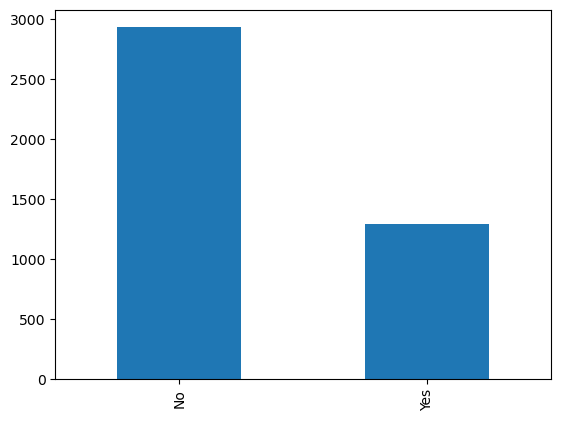


PHONE_SERVICE
Yes    3833
No      392
Name: phone_service, dtype: int64
Yes    0.907219
No     0.092781
Name: phone_service, dtype: float64


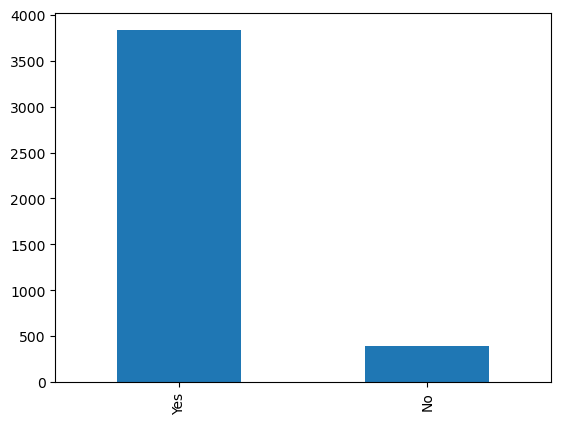


MULTIPLE_LINES
No                  2046
Yes                 1787
No phone service     392
Name: multiple_lines, dtype: int64
No                  0.484260
Yes                 0.422959
No phone service    0.092781
Name: multiple_lines, dtype: float64


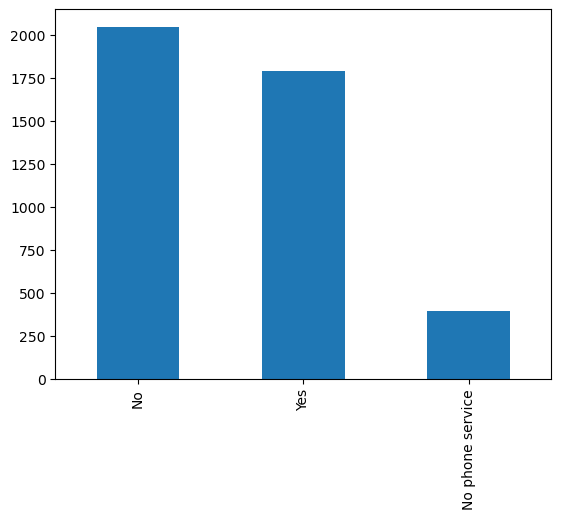


INTERNET_SERVICE_TYPE
Fiber optic    1882
DSL            1437
None            906
Name: internet_service_type, dtype: int64
Fiber optic    0.445444
DSL            0.340118
None           0.214438
Name: internet_service_type, dtype: float64


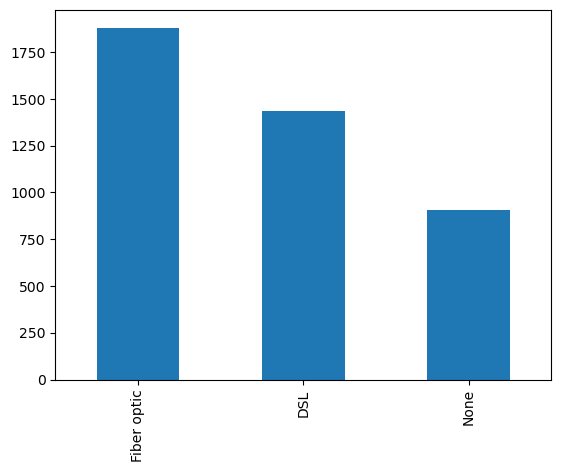


ONLINE_SECURITY
No                     2106
Yes                    1213
No internet service     906
Name: online_security, dtype: int64
No                     0.498462
Yes                    0.287101
No internet service    0.214438
Name: online_security, dtype: float64


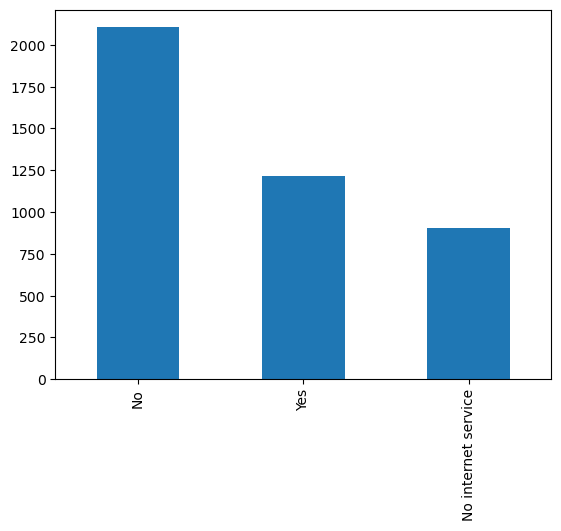


ONLINE_BACKUP
No                     1853
Yes                    1466
No internet service     906
Name: online_backup, dtype: int64
No                     0.438580
Yes                    0.346982
No internet service    0.214438
Name: online_backup, dtype: float64


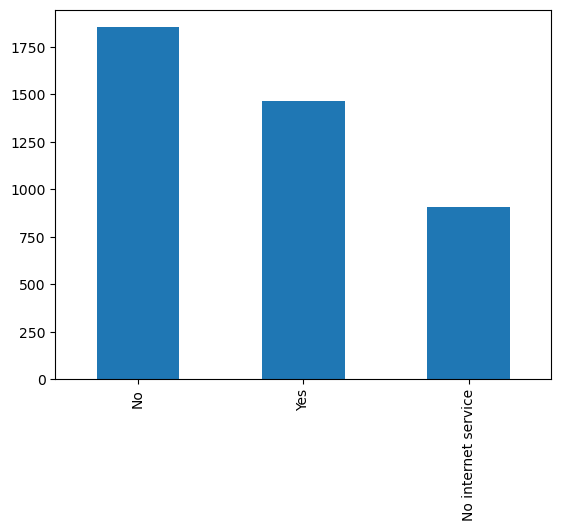


DEVICE_PROTECTION
No                     1860
Yes                    1459
No internet service     906
Name: device_protection, dtype: int64
No                     0.440237
Yes                    0.345325
No internet service    0.214438
Name: device_protection, dtype: float64


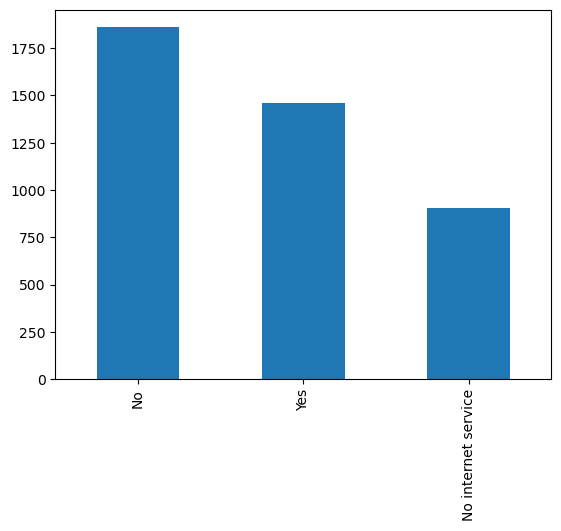


TECH_SUPPORT
No                     2072
Yes                    1247
No internet service     906
Name: tech_support, dtype: int64
No                     0.490414
Yes                    0.295148
No internet service    0.214438
Name: tech_support, dtype: float64


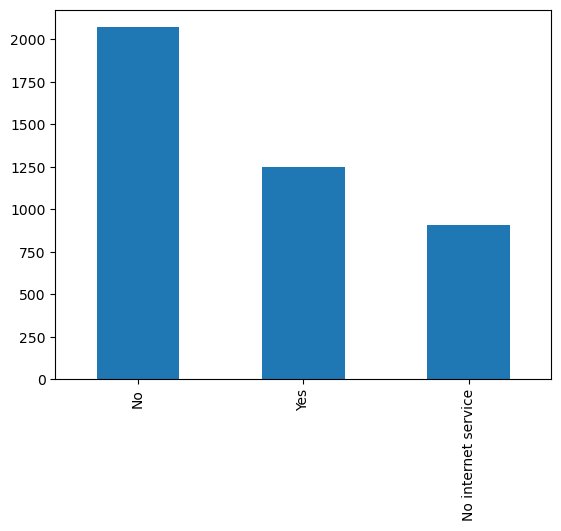


STREAMING_TV
Yes                    1675
No                     1644
No internet service     906
Name: streaming_tv, dtype: int64
Yes                    0.396450
No                     0.389112
No internet service    0.214438
Name: streaming_tv, dtype: float64


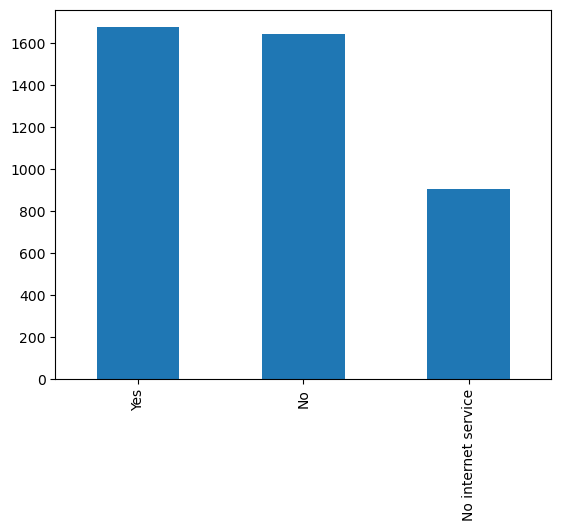


STREAMING_MOVIES
Yes                    1668
No                     1651
No internet service     906
Name: streaming_movies, dtype: int64
Yes                    0.394793
No                     0.390769
No internet service    0.214438
Name: streaming_movies, dtype: float64


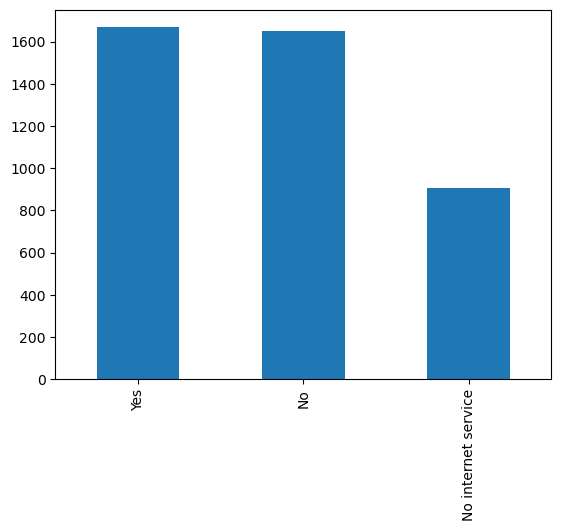


CONTRACT_TYPE
Month-to-month    2318
Two year          1039
One year           868
Name: contract_type, dtype: int64
Month-to-month    0.548639
Two year          0.245917
One year          0.205444
Name: contract_type, dtype: float64


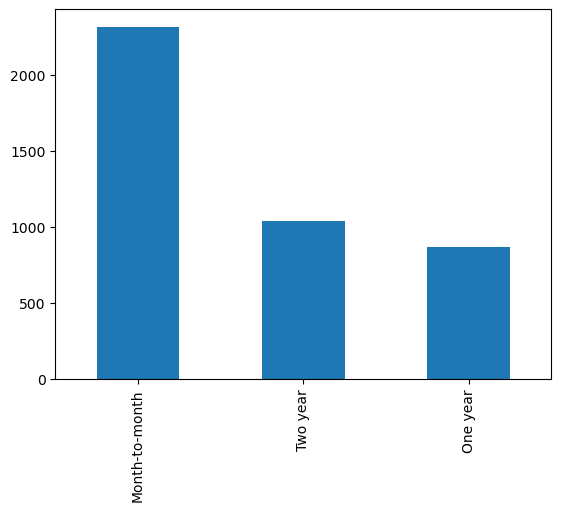


PAPERLESS_BILLING
Yes    2553
No     1672
Name: paperless_billing, dtype: int64
Yes    0.60426
No     0.39574
Name: paperless_billing, dtype: float64


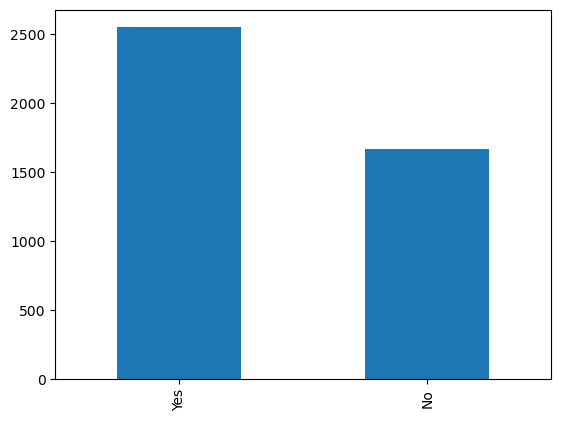


PAYMENT_TYPE
Electronic check             1405
Mailed check                  951
Bank transfer (automatic)     944
Credit card (automatic)       925
Name: payment_type, dtype: int64
Electronic check             0.332544
Mailed check                 0.225089
Bank transfer (automatic)    0.223432
Credit card (automatic)      0.218935
Name: payment_type, dtype: float64


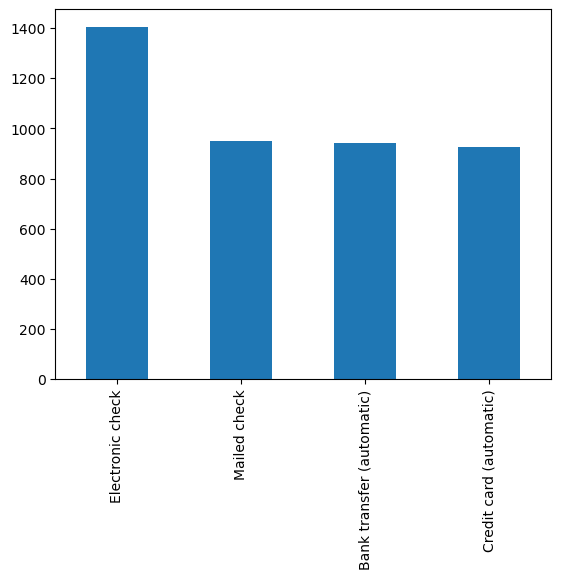


CHURN
No     3104
Yes    1121
Name: churn, dtype: int64
No     0.734675
Yes    0.265325
Name: churn, dtype: float64


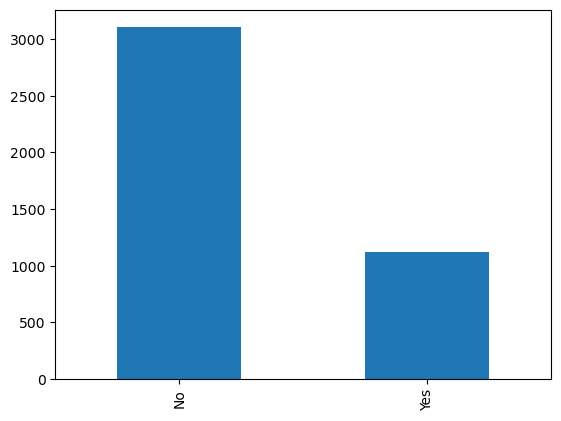

In [9]:
for col in col_cats:
    print (col.upper())
    print (ne_train[col].value_counts())
    print (ne_train[col].value_counts(normalize=True))
    ne_train[col].value_counts().plot.bar()
    plt.show()
    print()

### numeric variables

In [ ]:
for col in num_cats:
    print(col.upper())
    print(ne_train[col].value_counts())
    ne_train[col].hist()
    plt.show()
    print()

### Takeaways from initial visualization of categorical and continuous variables:

- Continuous variables: tenure and monthly charges; neither are normally distributed.
    - For tenure, there are many people with low tenure (<= ~ 7 months) and a good number with high tenure (> ~65 mo), but the majority are in the middle between about 10 and 65 months which is almost uniformly distributed.
- For the categorical variables:
    - gender is evenly distributed (males slightly outnumber females)
    - only 16% of the dataset are senior citizens
    - partner, dependendents are multiple lines are sorta, kinda related. 
        - yes_partner = 48%, yes_dependents = 30%, yes_multiple_lines = 42%
    - multiple_lines is the highest priority of these ot investigate because 
        1) it includes phone_service yes/no, so I can eliminate that variable
        2) it's kind of in the middle of partner and dependents. (They may all be worth looking at if I have time.)
    - internet_service_type of None (~21%) means those customers also will be None for: online_security, online_backup, tech_support, device_protection, streaming_tv, and streaming_movies
    - streaming_tv and streaming_movies are almost the same; probably the same people, so we can eliminate one
    - online_backup and device_protection are also very similar; possibly same people, consider eliminating one
    - online_security and tech_support are similar proportions, too.
    - COULD consider an engineered feature that counts add-on services
        - add-on services would be online_backup, device_protection, online_security, tech_support
        - new column would just be a count (0-4) of the number of those services a customer has
    - COULD consider an engineered feature of automatic payment vs NOT automatic payment
    
### New Priorities:
- Priority 1: Look at monthly_charges, tenure, contract_type, payment_type, paperliss_billing
- Priority 2: internet_service_type and tech_support (based on previous work on this dataset)
    - 2a: online_security, online_backup, device_protection
- Priority 3: gender, partner, dependents
- Priority 4:  multiple lines, senior_citizen, streaming_tv

- I don't plan to look at:
    - total_charges because it is related to tenure
    - phone_service because it is contained in multiple lines  
    - streaming_movies because it is so similar to streaming_tv

## Hypothesis: Is there a relationship between monthly charges and churn?

### Visualize

In [ ]:
sns.boxplot(data=ne_train, x='churn', y='monthly_charges')
plt.show()

In [ ]:
bin_range = range(10, 130, 10)
sns.histplot(ne_train[ne_train.churn == 'No'].monthly_charges, color='blue', bins=bin_range)
sns.histplot(ne_train[ne_train.churn == 'Yes'].monthly_charges, color='red', bins=bin_range)
plt.title('histplot of monthly_charges (red = churn, blue = no churn)')
plt.show()

* In the range $70-110, churn is ~50-70%

### Analyze monthly_charges vs churn with statistics
- $H_0$ There is NO relationship between churn and monthly charges
- $H_a$ There IS a relationship
- $\alpha$ = .05
categorical vs continuous variables not normally distributed => mannwhitneyu test

In [10]:
no_churn_monthly_charges = ne_train[ne_train.churn == 'No'].monthly_charges
yes_churn_monthly_charges = ne_train[ne_train.churn == 'Yes'].monthly_charges
t, p = stats.mannwhitneyu(no_churn_monthly_charges, yes_churn_monthly_charges)
t, p

(1351248.0, 1.261599899747347e-28)

### Summarize monthly_charges vs churn

- p is < .05, so we can reject the null hypothesis which suggests the $H_a$

- In summary, higher monthly charges increases the likelihood of churn.

## Hypothesis: Is there a relationship between tenure and churn?

### Visualize

In [ ]:
sns.boxplot(data=ne_train, x='churn', y='tenure')
plt.show()

### Analyze tenure vs churn with statistics
- $H_0$ There is NO relationship between churn and tenure
- $H_a$ There IS a relationship
- $\alpha$ = .05
categorical vs continuous variables not normally distributed => mannwhitneyu test

In [ ]:
no_churn_tenure = ne_train[ne_train.churn == 'No'].tenure
yes_churn_tenure = ne_train[ne_train.churn == 'Yes'].tenure
t, p = stats.mannwhitneyu(no_churn_tenure, yes_churn_tenure)
t, p

### Summarize tenure vs churn

- p is < .05, so we can reject the null hypothesis which suggests the $H_a$

- In summary, lower tenure increases the likelihood of churn.

## Hypothesis: Is there a relationship between contract_type and churn?

### Visualize

In [ ]:
sns.histplot(ne_train[ne_train.churn == 'No'].contract_type, color='blue')
sns.histplot(ne_train[ne_train.churn == 'Yes'].contract_type, color='red')
plt.title('histplot of contract_type (red = churn, blue = no churn)')
plt.show()

### Analyze contract_type vs churn with statistics
- $H_0$ There is NO relationship between churn and contract_type
- $H_a$ There IS a relationship
- $\alpha$ = .05
categorical vs categorical variables => chi^2 test

In [ ]:
# make contingency table
observed = pd.crosstab(ne_train.churn, ne_train.contract_type)
chi2, p, dof, expected = stats.chi2_contingency(observed)
chi2, p, dof, expected 

### Summarize contract_type vs churn

- p is < .05, so we can reject the null hypothesis which suggests the $H_a$

- In summary, Month-to-Month increases the likelihood of churn.

## Hypothesis: Is there a relationship between payment_type and churn?

### Visualize

In [ ]:
sns.histplot(ne_train[ne_train.churn == 'No'].payment_type, color='blue')
sns.histplot(ne_train[ne_train.churn == 'Yes'].payment_type, color='red')
plt.title('histplot of payment_type (red = churn, blue = no churn)')
plt.show()
# x axis has 4 categories. They are, from left to right:
# Electronic check, Credit card (automatic), Bank transfer (automatic), Mailed check

### Analyze contract_type vs churn with statistics
- $H_0$ There is NO relationship between churn and contract_type
- $H_a$ There IS a relationship
- $\alpha$ = .05
categorical vs categorical => chi^2 test

In [ ]:
observed = pd.crosstab(ne_train.churn, ne_train.contract_type)
chi2, p, dof, expected = stats.chi2_contingency(observed)
chi2, p, dof, expected

### Summarize contract_type vs churn

- p is < .05, so we can reject the null hypothesis which suggests the $H_a$

- In summary, having a payment_type of "Electronic check" increases the likelihood of churn.

## Hypothesis: Is there a relationship between paperless_billing and churn?

### Visualize

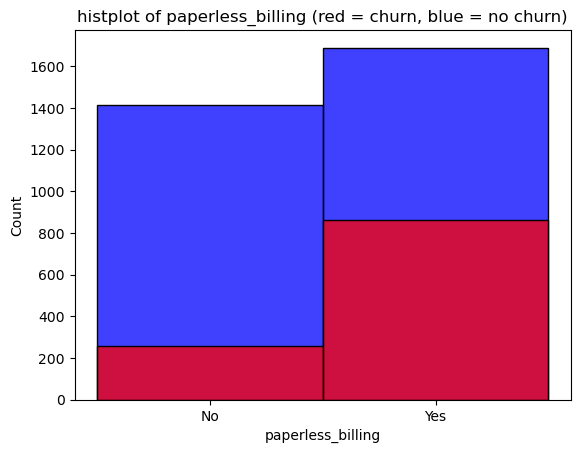

In [12]:
sns.histplot(ne_train[ne_train.churn == 'No'].paperless_billing, color='blue')
sns.histplot(ne_train[ne_train.churn == 'Yes'].paperless_billing, color='red')
plt.title('histplot of paperless_billing (red = churn, blue = no churn)')
plt.show()

### Analyze paperless_billing vs churn with statistics
- $H_0$ There is NO relationship between churn and paperless_billing
- $H_a$ There IS a relationship
- $\alpha$ = .05
categorical vs categorical => chi^2 test

In [ ]:
observed = pd.crosstab(ne_train.churn, ne_train.paperless_billing)
chi2, p, dof, expected = stats.chi2_contingency(observed)
chi2, p, dof, expected

### Summarize paperless_billing vs churn

- p is < .05, so we can reject the null hypothesis which suggests the $H_a$

- In summary, paperless_billing == "Yes" increases the likelihood of churn.

## Hypothesis: Is there a relationship between multiple_lines, internet_service_type, online_security, online_backup, device_protection, tech_support, streaming_tv and churn?

### Visualize - I'm cheating here a bit, but I'm going to loop through all of these things and visualize them

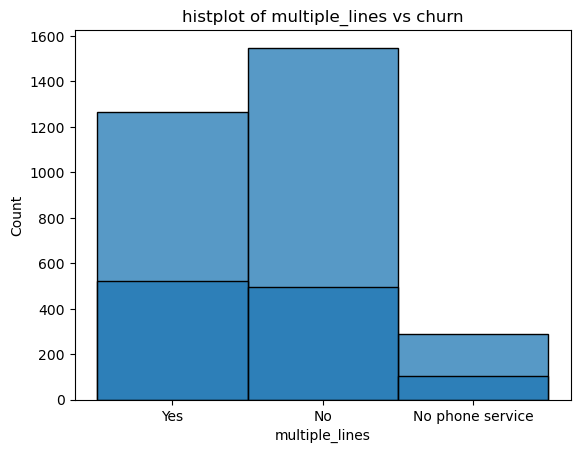

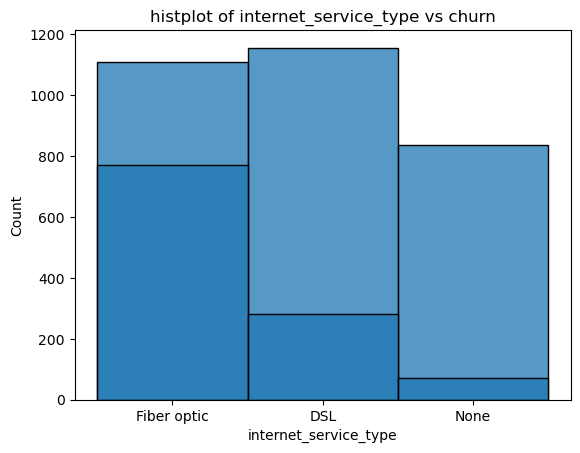

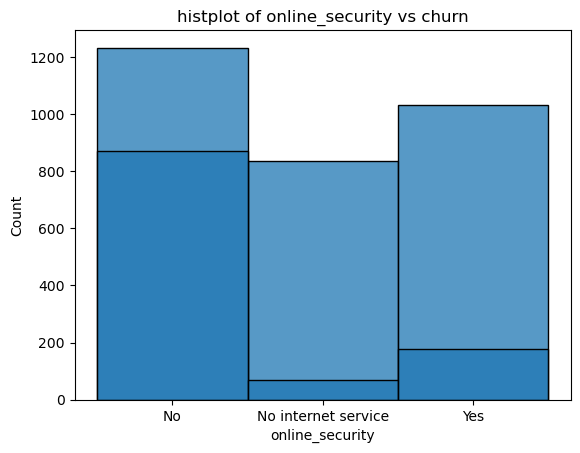

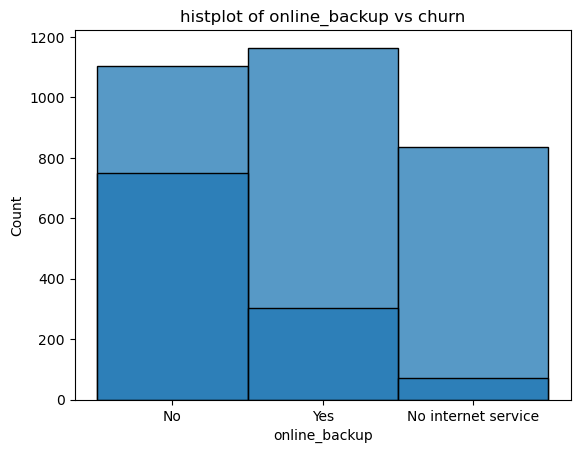

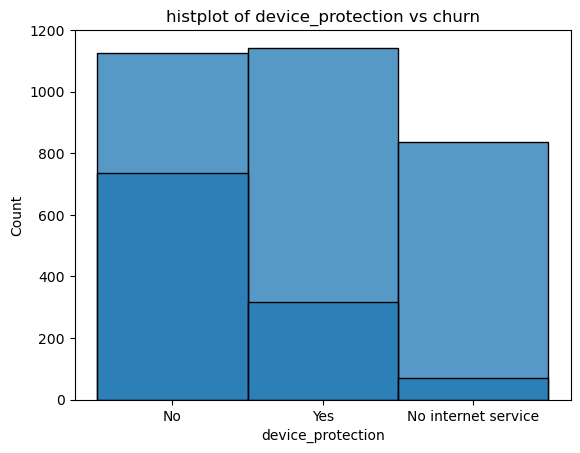

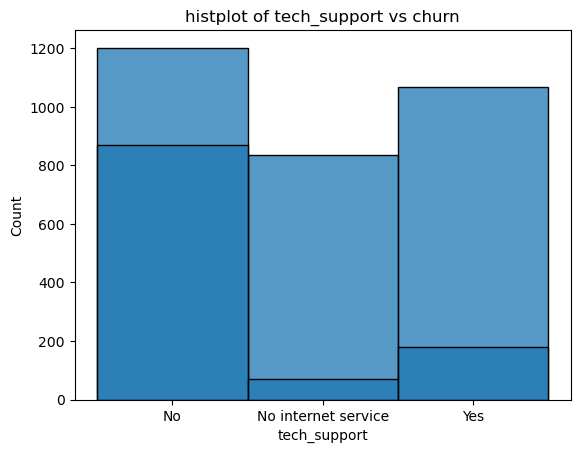

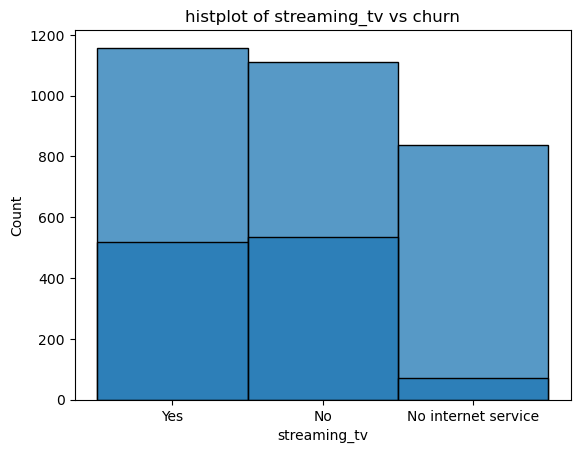

In [13]:
cols = ['multiple_lines', 'internet_service_type', 'online_security',
        'online_backup', 'device_protection', 'tech_support', 'streaming_tv']
target = 'churn'
e.cat_hist_plot(ne_train, cols, target)


### Summary of visualizing multiple categorical columns vs churn:
* multiple_lines didn't have a large affect (will need to test with stats)
* internet_service_type of Fiber optic has an affect
* NOT having online_security, online_backup, device_protection, tech_support increases likelihood of churn
* streaming_tv did not have much affect

## For modeling:
* INCLUDE monthly_charges, tenure, contract_type, payment_type, paperless_billing, internet_service_type, online_security, online_backup, device_protection, tech_support
* EXCLUDE multiple_lines (and phone_service which is directly related), streaming_tv, streaming_movies, total_charges (because it's related to tenure)
* FOR NOW EXCLUDE: gender, senior_citizen, partner, dependents 

### Analyze xxx vs churn with statistics
- $H_0$ There is NO relationship between churn and xxx
- $H_a$ There IS a relationship
- $\alpha$ = .05
Test type? (e.g. categorical vs continuous variables not normally distributed => mannwhitneyu test

### Summarize xxx vs churn

- p is < .05, so we can reject the null hypothesis which suggests the $H_a$

- In summary, xxx increases the likelihood of churn.

In [11]:
# for later if I have time: work on a function to return a confusion matrix for a "simple model"
# i.e. what if we just predict churn for everyone with monthly_charges >=30 or maybe tenure <= 20

In [ ]:
ne_train[(ne_train.monthly_charges >= 30].churn.value_counts()
ne_train[ne_train.monthly_charges < 30].churn.value_counts()